# 회귀분석

## 회귀분석 (Regression) 이란?
1. 독립변수(X)와 종속변수(y)의 관계식을 구하는 방법으로, **독립변수가 1단위 증가할때 종속변수에 미치는 영향**을 측정하기 위한 통계적 예측 모형  
    - ![img](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Normdist_regression.png/300px-Normdist_regression.png)  
  
2. 추정
    - 추정 : 모집단을 대표할 수 있는 일부를 표본으로 추출하여, 분석한 통계량을 이용해서 모집단의 모수를 예측하는 과정
    - 추정 지표 : 회귀식, 회귀계수
3. 검정 : 
    - 가설검정 : 표본을 추출하여 얻은 표본통계량으로 모집단 모수에 대한 새로운 예상·가설 등이 옳다고 판단할 수 있는지를 평가
    - 지표 : 독립변수의 영향력, 모형의 적합성(R2) 등

## 회귀분석 (Regression) 종류
1. 단순 회귀 분석
- 독립 변수가 1개인 회귀 모형
- Ex) 우림의 수행 프로젝트 갯수(X)를 이용하여 우림의 연봉(y)을 예측하는 모형
2. 중 회귀 분석
- 독립 변수가 2개 이상인 회귀 모형
- Ex) 직장인의 연령(X1)과 하루 평균 업무 시간(X2)을 이용하여 그 직장인의 연봉(y)을 예측하는 모형
- 종류 :
    |기법|대상 변수 (A)|대상 변수 (B)|적용 예시|
    |-----------|-------------|-------|--------------|
    |카이제곱 검정|이산형|이산형|성별과 승진유무 사이에 유의한 관계가 있는가?|
    |독립표본 t 검정|이산형(2그룹/독립)|연속형|성별에 따른 연봉 인상률의 차이가 있는가?|
    |대응표본 t 검정|이산형(2그룹/Pair)|연속형|추가업무 시간 후 연봉 인상률의 변화가 있었는가?|
    |일원배치분산분석(ANOVA)|이산형(3그룹 ⬆️)|연속형|MBTI에 따른 연봉 인상률의 변화가 있었는가?|
    |대응표본 t 검정|이산형(2그룹/Pair)|연속형|투자 교육비와 연봉 인상률 사이에 유의한 관계가 있는가?|

## 회귀분석 프로세스
1. 분석을 위한 주제 결정
    - Ex) 야근시간이 직원의 연봉 인상에 영향을 주는가?
2. 독립변수와 종속변수 선정
    - 독립변수 : 연구자가 의도적으로 변화시키는 변수
    - 종속변수 : 연구자가 독립변수의 변화에 따라 어떻게 영향을 받는지(값의 변화) 알고 싶어하는 변수
    - Ex) 독립변수 = 야근시간, 종속변수 = 연봉인상률
3. 가설 설정
    - 귀납법
        - 개별적인 특수한 사실이나 현상에서 그러한 사례들이 포함되는 일반적인 결론을 이끌어내는 또는 역으로 보편성에서 구체성을 유도하는 추론 형식 · 추리 방법
        - 본래 자신이 주장하고자 하는 내용과 **정반대의 가설(귀무가설)**을 세우고 이 **가설을 검증하여 잘못된 것임을 밝혀내 본래의 가설(대립 가설)이 옳다는 것**을 주장하는 방식
    - 가설 : 어떤 사실을 증명하거나 증명하기 위해 설정한 가정
        - 귀무가설(H0) : 연구에서 검증하는 가설
        - 대립가설(H1)  귀무가설과 반대되는 가설로서 연구자가 **연구를 통해 입증되기를 기대하는 예상이나 주장**하는 내용
    - Ex) 
        * 귀무가설(H0) : 야근시간이 연봉인상률에 영향을 주지 않는다.
        * 대립가설(H1) : 야근시간이 연봉인상률에 영향을 준다.
4. 데이터 수집
5. 데이터 전처리
    - 결측값 처리, 이상치 처리, 표준화 등
6. 모델을 적용해 데이터 분석
7. 결과 해석
    - **p-value < 0.05 --> 대립가설(H1) 채택**
    - p-값(p-value)
        * 귀무 가설(null hypothesis)이 맞다는 전제 하에, 표본에서 실제로 관측된 통계치와 '같거나 더 극단적인' 통계치가 관측될 확률
        * 관찰된 데이터가 귀무가설과 양립하는 정도를 0에서 1 사이의 수치로 표현한 것
    - 0.65에서 0.7 이상이어야 좋은 회귀모형
    

# [실습] 전기생산량과 전기사용량 예측

In [90]:
# 라이브러리 불러오기
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats # 통계관련 라이브러리
from matplotlib import font_manager, rc

#한글처리 설정하기
#윈도우인 경우
    # font_name = font_manager.FontProperties(fname="c:/Windows/fonts/malgun.ttf").get_name()
    # rc('font', family=font_name)
#Mac인 경우 한글폰트 처리 & 마이너스 기호깨짐 방지
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 워터마크 익스텐션 불러오기
# Mac Anaconda에서 워터마크 다운로드하기
# conda install -c conda-forge watermark 
# 워터마크 익스텐션 로딩
%load_ext watermark

#Python 버전,OS, 시스템 정보 출력
%watermark


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2022-03-23T20:39:42.468093+09:00

Python implementation: CPython
Python version       : 3.7.11
IPython version      : 7.31.1

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



LinregressResult(slope=0.4759471146882953, intercept=0.9126121261026394, rvalue=0.7406933889736358, pvalue=0.005858687998750186, stderr=0.13651744906395627, intercept_stderr=0.5374000900268991)


Text(0, 0.5, '전기소비량')

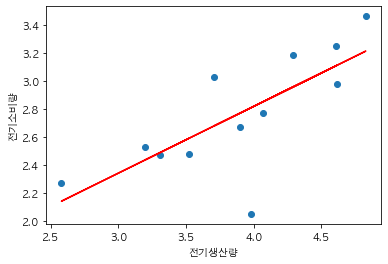

In [91]:
# 회귀분석 : 전기 생산량에 따른 소비량 예측
# 독립변수 : 전기 생산량 --> 1개 이므로 단순회귀분석(선형회귀) 사용
# 종속변수 : 소비량
# 귀무가설(목표) : 전기 생산량과 소비량 간에 상관관계가 있다.
# 대립가설(목표반대) : 전기 생산량과 소비량 간에 상관관계가 없다.

#월별 전기생산량(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
y = [2.48, 2.27, 2.47, 2.77, 2.98, 2.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 기울기(slope), 절편(intercept), 상관계수(rvalue), p-값(p-value, 예측 불확실성을 나타냄), 에러 표준편차(stderr) 구하기
# p-value < 0.05 --> 통계학적 의미 ᄋ

#linregress(독립변수, 종속변수) 선형회귀분석
result = stats.linregress(X,y)
print(result) # pvalue=0.005858687998750186 > 0.05 --> 귀무가설 채택 !!!
# 결론 : 전기 생산량과 소비량간에 상관관계가 있다.

# 상관분석 : 두 변수간에 어떤 선형적 관계가 있는지 분석
# 상관계수(rvalue) : 상관관계의 정도를 파악하는 값 (-1 ~ 1)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(X, y)
X1 = np.array(X)

# 산점도 그리기
plt.scatter(X, y)

# 회귀선 그리기
plt.plot(X1, slope*X1 + intercept, c = "red")
plt.xlabel("전기생산량")
plt.ylabel("전기소비량")

In [92]:
#전기 생산량이 4일 때 전기 소비량을 예측하세요
# 특정값 * slope + intercept = 소비량
4 * slope + intercept

2.8164005848558205

In [93]:
# p-value의 계산
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# 독립표본 t검정 : 표본으로부터 측정된 분산, 표준편차를 이용하여 두 모집단 간의 평균 차이를 검정
def independent_ttset(data1, data2, alpha):
    # 평균값
    mean1, mean2 = mean(data1), mean(data2)
    # 표준 오차 (sem(데이터셋)): 표본평균의 표준편차 --> 모집단이 큰 경우 표본을 여러번 추출하는데, 이 때마다 표본들의 평균값이 달라짐
    se1, se2 = sem(data1), sem(data2)
    # 표본 간 차이에 관한 표준오차 계산
    sed = sqrt(se1**2 + se2**2)
    # t 통계량 계산 --> 평균간 차이 / 표준오차
    t_stat = (mean1 - mean2) / sed
    # 자유도(degress of freedom) 계산 (샘플개수 -1) --> 표본수가 n개인 표본이 있으면, 자유롭게 변할 수 있는 값은 n-1개의 표본
    df = len(data1) + len(data2)
    # p-value 계산 (cdf 누적분포함수)
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, p

# 독립변수(input) --> 전기 소비량
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

#종속변수(output) --> 전기 생산량
y = [2.48, 2.27, 2.47, 2.77, 2.98, 2.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 95% 신뢰수준
alpha = 0.05
t_stat, p = independent_ttset(X, y, alpha)
print('t=%.3f, p-value=%f' % (t_stat, p))

if p > alpha:
    print('p-value > 0.05, 귀무가설 채택, 대립가설 기각')
else:
    print('p-value < 0.05, 귀무가설 기각, 대립가설 채택')

t=4.939, p-value=0.000049
p-value < 0.05, 귀무가설 기각, 대립가설 채택


### [실습] 확률분포와 누적분포함수
- 확률 분포 : 어떤 사건에 어느 정도의 확률이 할당되었는지를 묘사한 것
- 누적분포함수(cumulative distribution function)
    * 모든 사건에 대해 구간을 정의하기가 어려우므로 시작점을 음의 무한대로 설정
    * 음의 무한대 ~ -1 , 음의 무한대 ~ 0, 음의 무한대 ~ 1로 구간 정의

[-8.         -7.83838384 -7.67676768 -7.51515152 -7.35353535 -7.19191919
 -7.03030303 -6.86868687 -6.70707071 -6.54545455 -6.38383838 -6.22222222
 -6.06060606 -5.8989899  -5.73737374 -5.57575758 -5.41414141 -5.25252525
 -5.09090909 -4.92929293 -4.76767677 -4.60606061 -4.44444444 -4.28282828
 -4.12121212 -3.95959596 -3.7979798  -3.63636364 -3.47474747 -3.31313131
 -3.15151515 -2.98989899 -2.82828283 -2.66666667 -2.50505051 -2.34343434
 -2.18181818 -2.02020202 -1.85858586 -1.6969697  -1.53535354 -1.37373737
 -1.21212121 -1.05050505 -0.88888889 -0.72727273 -0.56565657 -0.4040404
 -0.24242424 -0.08080808  0.08080808  0.24242424  0.4040404   0.56565657
  0.72727273  0.88888889  1.05050505  1.21212121  1.37373737  1.53535354
  1.6969697   1.85858586  2.02020202  2.18181818  2.34343434  2.50505051
  2.66666667  2.82828283  2.98989899  3.15151515  3.31313131  3.47474747
  3.63636364  3.7979798   3.95959596  4.12121212  4.28282828  4.44444444
  4.60606061  4.76767677  4.92929293  5.09090909  5.

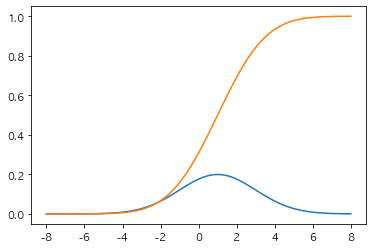

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

xx = np.linspace(-8, 8, 100) #-8에서 8 사이에 100개의 일정간격 숫자로 이루어진 배열 생성
print(xx)

#정규분포 생성
rv = sp.stats.norm(loc=1, scale=2) #loc : 분포의 기대값, scale : 분포의 표준편차

cdf = rv.cdf(xx) #누적분포함수
pdf = rv.pdf(xx) #확률밀도함수 (누적분포함수를 미분한 함수)

print(xx[:5])
print(cdf[:5])
plt.plot(xx, pdf)
plt.plot(xx, cdf)
plt.show()

### [실습] 가상의 회귀분석 데이터 생성 함수 (make_regression)
- 파라미터
    - n_fetures : 독립변수 개수
    - bias : y 절편
    - noise : y의 표준편차
    - coef : 회귀계수(기울기) 사용 여부, True이면 w값 리턴


In [95]:
from sklearn.datasets import make_regression
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, random_state=0, coef=True)
print(X[:5])
print(X[:5].flatten()) #flatten() : numpy에서 제공하는 다차원 배열 공간을 1차원으로 평탄화해주는 함수
print(y[:5])
print(w)

[[-0.85409574]
 [ 1.49407907]
 [-0.34791215]
 [ 0.44386323]
 [-0.18718385]]
[-0.85409574  1.49407907 -0.34791215  0.44386323 -0.18718385]
[ 69.16576208 129.94932345  80.01389923 100.30585701 107.20314663]
15.896958364551972


In [96]:
import numpy as np
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
print(y0)

[ 52.30912491  53.27257693  54.23602895  55.19948097  56.16293299
  57.12638502  58.08983704  59.05328906  60.01674108  60.98019311
  61.94364513  62.90709715  63.87054917  64.83400119  65.79745322
  66.76090524  67.72435726  68.68780928  69.6512613   70.61471333
  71.57816535  72.54161737  73.50506939  74.46852141  75.43197344
  76.39542546  77.35887748  78.3223295   79.28578152  80.24923355
  81.21268557  82.17613759  83.13958961  84.10304164  85.06649366
  86.02994568  86.9933977   87.95684972  88.92030175  89.88375377
  90.84720579  91.81065781  92.77410983  93.73756186  94.70101388
  95.6644659   96.62791792  97.59136994  98.55482197  99.51827399
 100.48172601 101.44517803 102.40863006 103.37208208 104.3355341
 105.29898612 106.26243814 107.22589017 108.18934219 109.15279421
 110.11624623 111.07969825 112.04315028 113.0066023  113.97005432
 114.93350634 115.89695836 116.86041039 117.82386241 118.78731443
 119.75076645 120.71421848 121.6776705  122.64112252 123.60457454
 124.568026

Text(0.5, 1.0, 'regression')

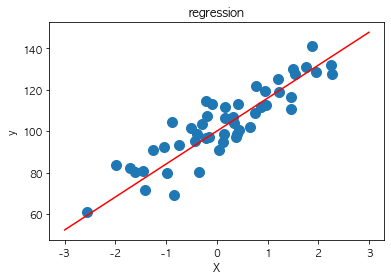

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("X")
plt.ylabel("y")
plt.title("regression")

## 최소자승법 (OLS)
- 잔차(Residual) : 실제 값과 예측 값의 차이
- 최소자승법(OLS, Ordinary Least Squares)
    - 어떤 모델의 파라미터를 구하는 한 방법으로서, 잔차 제곱의 합이 최소가 되도록 모델의 파라미터를 구하는 방법
    - 각 점들과 그래프 간의 오차가 가장 최소가 되는 f(x)를 찾음
- f(x)가 직선 ax + b인 경우
    - ![img](https://t1.daumcdn.net/cfile/tistory/247A613F5170E5FD21)

### [실습] 최소자승법 사용해보기

In [98]:
# OLS, Ordinary Least Squares
from sklearn.datasets import make_regression

bias = 100
X, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state = 1)
print(X[:5])
print(y[:5])
print(w)

#sklearn 패키지의 회귀분석 함수
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

#절편(상수항), 가중치(기울기)
print(model.intercept_, model.coef_)

#새로운 입력값에 관한 예측 (2차원 배열로 입력)
model.predict([[-2], [-1], [0], [1], [2]])
print(X.flatten()[:5])
print(y[:5])

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]
86.44794300545998
99.79150868986945 [86.96171201]
[ 0.23249456 -0.03869551  0.5505375   0.50318481  2.18697965]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]


In [99]:
import pandas as pd
df = pd.DataFrame({'x': X.flatten(), 'y' : y})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [100]:
# statsmodels 패키지 : 추정 및 검정, 회귀분석, 시계열분석 등의 기능을 제공하는 파이썬 패키지
# conda install statsmodels
import statsmodels.api as sm
X = df[["x"]]
y = df[["y"]]

# 최소자승법(OLS)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              167.2
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                    3.66e-28
Time:                        20:39:43   Log-Likelihood:                         -1204.0
No. Observations:                 200   AIC:                                      2410.
Df Residuals:                     199   BIC:                                      2413.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             99.6428      7.706     12.931      0.000      84.448     114.838
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.415
Skew:                           0.079   Prob(JB):                        0.813
Kurtosis:                       3.158   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# 새로운 값 예측
result.predict([-2, -1, 0, 1, 2])

# 가중치(기울기)
print("기울기 : ",result.params)

# 잔차 (실제값과 예측값의 차이)
print("잔차 : ", result.resid)

기울기 :  x    99.64283
dtype: float64
잔차 :  0      104.712602
1       96.888644
2      107.000394
3       91.553292
4       65.343279
          ...    
195    105.055511
196    105.871796
197     70.418046
198     99.984395
199    100.673331
Length: 200, dtype: float64


Text(0, 0.5, 'Residual')

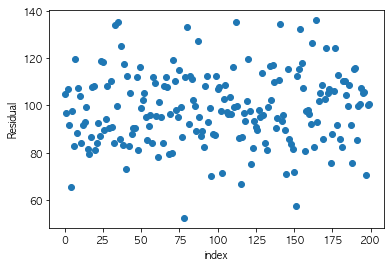

In [102]:
# 잔차 벡터 그래프
%matplotlib inline
import matplotlib.pyplot as plt

result.resid.plot(style="o")
plt.xlabel("index")
plt.ylabel("Residual")

## 회귀분석 모형의 성능

In [103]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
import pandas as pd

X, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX = pd.DataFrame(X, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y~X", data=df)
result = model.fit()
result.predict(dfX)

0    -17.934714
1     39.638175
2     14.893262
3    -37.478808
4    -40.694820
        ...    
95   -52.645684
96   -18.072076
97    12.912314
98   -71.981016
99   -53.312776
Length: 100, dtype: float64

In [104]:
# Total Sum of Square (종속변수 y의 분산)
print("TSS = ", result.uncentered_tss)

# Explained Sum of Square (예측값의 분산)
print("ESS = ", result.mse_model)

# Result Sum of Square (잔차의 분산, 오차의 크기)
# 0에 가까울수록 좋은 모형
print("RSS =", result.mse_model)

# 결정계수 : 모형의 설명(0~1 사이의 값)
# 1 - RSS/TSS = ESS/TSS
print("R Square =", result.rsquared)

print(result.summary())

TSS =  291345.7578983061
ESS =  188589.61349210917
RSS = 188589.61349210917
R Square = 0.6473091780922586
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           6.60e-24
Time:                        20:39:44   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## [실습] 회귀분석 - 붓꽃 품종 데이터셋
### 붓꽃의 꽃받침 너비와 꽃받침 길이의 상관관계

In [105]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [106]:
# 붓꽃 데이터셋 로딩하기
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [107]:
# 변수명 확인
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### 귀무가설 : 꽃받침의 너비와 꽃받침의 길이가 서로 상관관계가 있다

In [108]:
# SepalWidth(꽃받침의 너비)로 SepalLength(꽃받침의 길이)를 예측
# 귀무가설 : 꽃받침의 너비와 길이가 상관관계가 없다.
# 대립가설 : 꽃받침의 너비와 길이가 상관관계가 있다.
X = iris.data[:, 1]
y = iris.data[:, 0]

In [109]:
# 선형회귀
result = stats.linregress(X, y)
result 
# p-value > 0.05 --> 유의성 X, rvalue= -11.7 %
# 결론: 꽃받침 너비와 길이는 상관관계가 없다.

LinregressResult(slope=-0.2233610611298999, intercept=6.526222550894481, rvalue=-0.11756978413300208, pvalue=0.15189826071144782, stderr=0.15508092994240763, intercept_stderr=0.4788963398440871)

Text(0, 0.5, 'SepalLength')

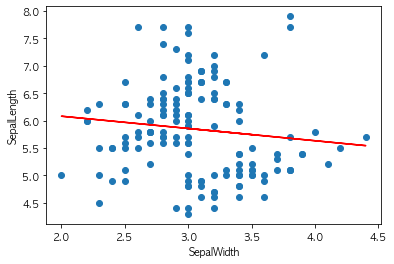

In [110]:
# 결과 시각화
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
X1 = np.array(X)

# 산점도
plt.scatter(X, y)

# 회귀선
plt.plot(X1, slope * X1 + intercept, c= "red")
plt.xlabel("SepalWidth")
plt.ylabel("SepalLength")

#### 귀무가설 : 꽃잎의 너비와 꽃잎의 길이가 서로 상관관계가 있다

In [111]:
# Petal.Width(꽃잎의 너비)로 Petal.Width(꽃잎의 길이)를 예측
# 귀무가설 : 꽃잎의 너비와 길이는 상관관계가 없다.
# 대립가설 : 꽃잎의 너비와 길이는 상관관계가 있다.
X = iris.data[:, 3]
y = iris.data[:, 2]

result = stats.linregress(X, y)
result
# p-value < 0.05 --> 유의함
# rvalue = 96.2% --> 모델 정확도 높음
# 결론 : 꽃잎의 너비와 길이는 강한 양의 상관관계가 있다.

LinregressResult(slope=2.229940495121865, intercept=1.08355803285051, rvalue=0.9628654314027963, pvalue=4.6750039073255014e-86, stderr=0.0513962314651412, intercept_stderr=0.07296696269883872)

Text(0, 0.5, 'SepalLength')

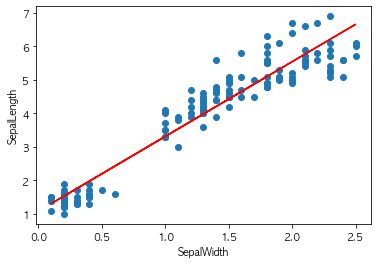

In [112]:
# 결과 시각화
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
X1 = np.array(X)

# 산점도
plt.scatter(X, y)

# 회귀선
plt.plot(X1, slope * X1 + intercept, c= "red")
plt.xlabel("SepalWidth")
plt.ylabel("SepalLength")

## [실습] 다중회귀분석 실습

In [113]:
from sklearn.datasets import load_boston

#보스턴 주택가격 데이터셋 로딩
boston = load_boston()

#데이터셋의 형태
print("데이터셋의 행과 열 개수 :", boston.data.shape)
print("데이터 타입 :", type(boston.data))
print("첫 행 세개 : ",boston.data[:3])

데이터셋의 행과 열 개수 : (506, 13)
데이터 타입 : <class 'numpy.ndarray'>
첫 행 세개 :  [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


/Users/woodeem/opt/anaconda3/envs/woodeem/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [114]:
# 데이터셋에 대한 설명
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

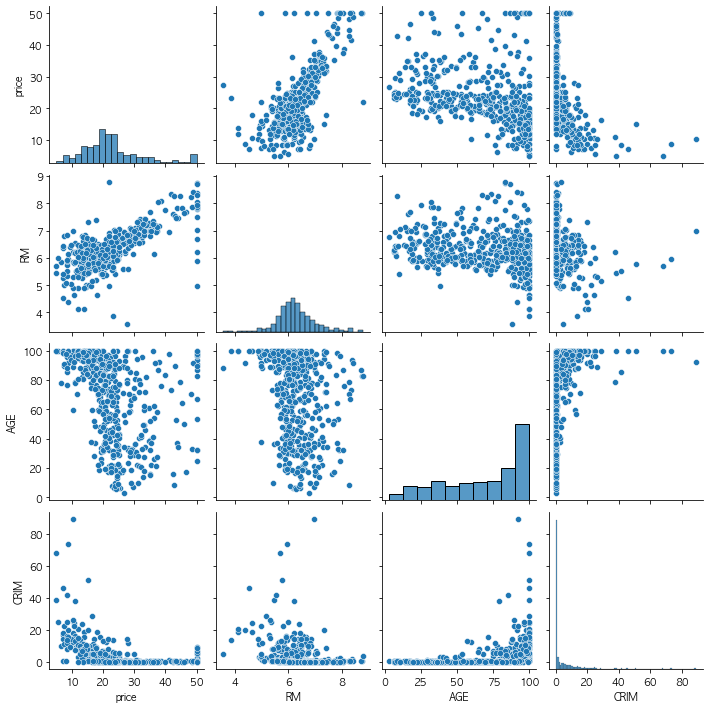

In [115]:
# 회귀 분석 : 단답형
# 분류 : 선택형
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#데이터셋을 데이터 프레임워크로 불러오고, 주택가격을 타겟변수로 저장
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["price"] = boston.target #주택가격

#산점도 행렬 (RM : 방의 개수, AGE : 노후화, CRIM : 범죄율)
g = sns.pairplot(df[["price", "RM", "AGE", "CRIM"]])
plt.show()

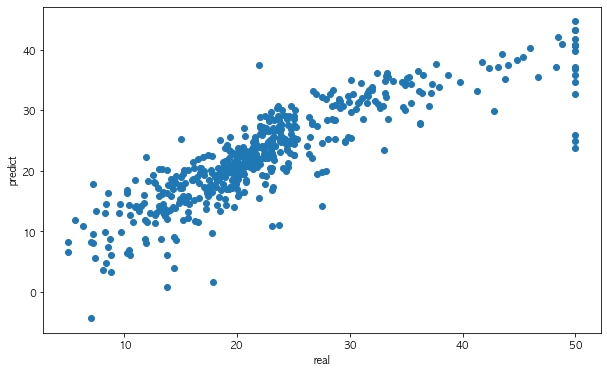

In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.figure(figsize=(10,6))
plt.scatter(boston.target, predicted)
plt.xlabel("real")
plt.ylabel("predict")
plt.show()

In [117]:
# 13개 필드, 특성끼리 곱하여 데이터 확장
# 범죄율, 고속도로 접근성 --> 범죄율* 고속도로 접근성 계산
# 13개 특성을 확장해 91개를 더해 총 104개
# conda install 
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))


X.shape: (506, 104)


/Users/woodeem/opt/anaconda3/envs/woodeem/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [118]:
# 종속변수 : 주택가격, 주택가격 중앙값
# 독립변수 : CRIM(범죄율), INDUS(비소매상업지역 면적 비율), NOX(일산화질소 농도), RM(주택당 방 수), LSTAT(인구 중 하위 계층 비율), B(인구 중 흑인 비율), PTRATIO(학생/교사 비율), ZN(25000평방피트를 초과하는 거주지역 비율), CHAS(찰스강 경계에 위치했는지 여부), AGE(1940년 전 건축된 주택 비율), RAD(고속도로까지 거리), DIS(고용지원센터까지 거리), TAX(재산세율)
boston.feature_names #컬럼이름 확인하기

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [119]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([X, y], axis=1) #컬럼 방향 연결
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [120]:
# 필요한 모듈 임포트
from sklearn.model_selection import train_test_split #학습&검증용 데이터셋 나누기
from sklearn.linear_model import LinearRegression #선형회귀
# Hold Out --> 학습용 : 검증용 = 7 : 3 비율로 데이터셋 나눔
# 랜덤으로 나누는 것을 반복하기 때문에 seed를 고정해주어야함
# seed : random_state 인자는 함수의 무작위성을 컨트롤해서 재현 가능한 결과를 구현함 --> 수행시마다 동일한 결과를 얻기 위해 적용
# train_test_split(독립변수, 종속변수, test_size = 검증용 데이터 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 선형회귀 모델 생성 및 학습
model = LinearRegression().fit(X_train, y_train)

print("학습용 :", model.score(X_train, y_train))
print("검증용 :", model.score(X_test, y_test))

학습용 : 0.7495400632086622
검증용 : 0.6996255772983122


In [121]:
# 상관계수
coef = model.coef_
print("상관계수 :", coef)

# 절편
intercept = model.intercept_
print("y절편 :", intercept)

상관계수 : [[-1.53776087e-01  6.50159270e-02 -2.42597326e-02  1.62203309e+00
  -1.52999306e+01  3.35196668e+00  1.13259963e-02 -1.54810871e+00
   3.02641886e-01 -1.22317535e-02 -8.11539044e-01  1.29504798e-02
  -5.44861583e-01]]
y절편 : [34.24483703]


/Users/woodeem/opt/anaconda3/envs/woodeem/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


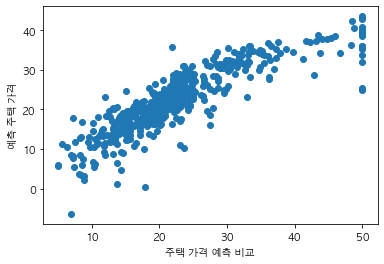

In [122]:
# 예측 비교하기
pred = model.predict(boston.data) #예측하기
plt.scatter(boston.target, pred) #실제값과 예측값 산점도로 비교
plt.xlabel("실제 주택 가격")
plt.ylabel("예측 주택 가격")
plt.xlabel("주택 가격 예측 비교")
plt.show()

#### 각 특성들의 상관관계

Text(0, 0.5, '주택가격')

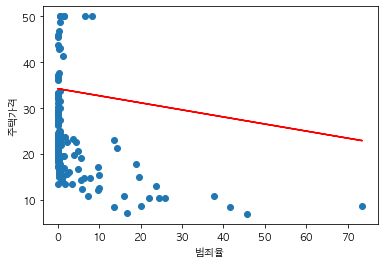

In [123]:
#범죄율과 주낵가격 상관관계
#산점도 그리기
plt.scatter(X_test["CRIM"], y_test)

#회귀선 그리기
plt.plot(X_test["CRIM"], coef[0][0]*X_test["CRIM"] + intercept, c = "red")
plt.xlabel("범죄율")
plt.ylabel("주택가격")

Text(0, 0.5, '주택가격')

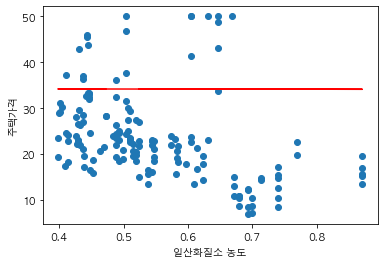

In [124]:
#일산화질소 농도와 주택가격 상관관계
#산점도 그리기
plt.scatter(X_test["NOX"], y_test)

#회귀선 그리기
plt.plot(X_test["NOX"], coef[0][0]*X_test["NOX"] + intercept, c = "red")
plt.xlabel("일산화질소 농도")
plt.ylabel("주택가격")

Text(0, 0.5, '주택가격')

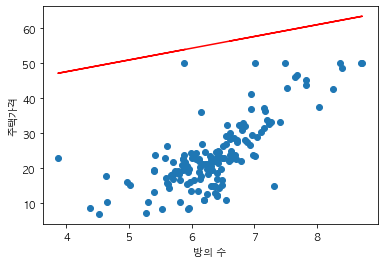

In [125]:
#방의 수와 주택가격 상관관계
plt.scatter(X_test["RM"], y_test)

#회귀선 
plt.plot(X_test["RM"], coef[0][5] * X_test["RM"] + intercept, c="red")
plt.xlabel("방의 수")
plt.ylabel("주택가격")

#### 최소자승법 (OLS)

In [126]:
import pandas as pd
import statsmodels.api as sm

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()

print("회귀계수\n", result_boston2.params)
print("R-sqaure\n", result_boston2.rsquared) #회귀모델의 설명력
print("P values\n", result_boston2.pvalues)

#요약 결과 출력
print(result_boston2.summary())

회귀계수
 CRIM      -0.092897
ZN         0.048715
INDUS     -0.004060
CHAS       2.853999
NOX       -2.868436
RM         5.928148
AGE       -0.007269
DIS       -0.968514
RAD        0.171151
TAX       -0.009396
PTRATIO   -0.392191
B          0.014906
LSTAT     -0.416304
dtype: float64
R-sqaure
 0.9591890143535311
P values
 CRIM       7.197130e-03
ZN         7.762640e-04
INDUS      9.497886e-01
CHAS       1.689461e-03
NOX        3.935067e-01
RM         1.179476e-61
AGE        5.989795e-01
DIS        1.016889e-06
RAD        1.064354e-02
TAX        1.698772e-02
PTRATIO    3.925055e-04
B          5.266943e-08
LSTAT      2.142519e-15
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
D

### 변수 선택 방법 2가지
#### 1. 전진 선택법
- **공집합인 상태에서 변수를 1개씩 추가**하면서 전체 모델의 성능이 좋아질 때까지 **변수를 계속 증가**시키는 방법


#### 2. 후진 제거법
- 전체 변수를 대상으로 미리 정의한 모든 **통계 수치(유의수준, 다중공선성 등)** 를 만족할 때까지 반복적으로 **변수를 하나씩 제거**하는 방법(pvalue가 더 중요함)
- 변수를 하나씩 제거하다가 **pvalue 증가** 또는 **rsquare 값이 더이상 증가하지 않는** 현상이 일어나면 그만! 

In [127]:
# 변수들의 상관관계
# 상관계수 행렬
dfX.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


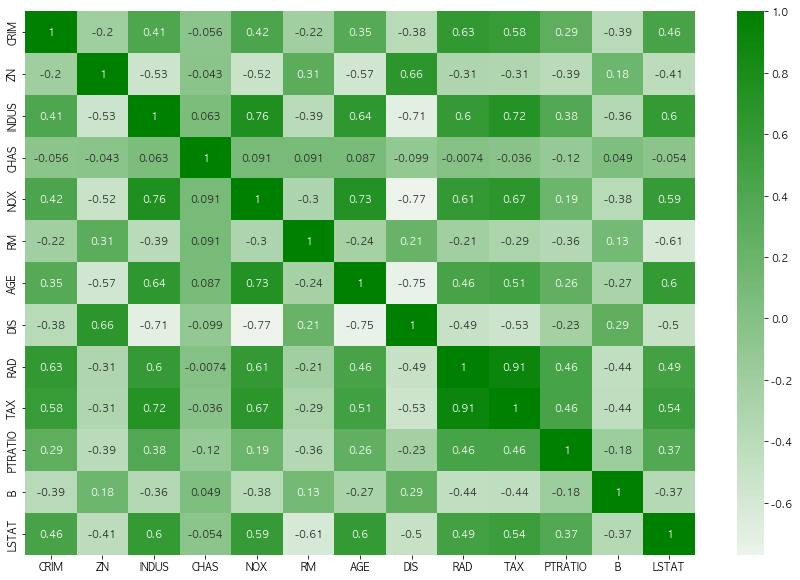

In [128]:
# 상관관계 히트맵으로 확인
import seaborn as sns
plt.figure(figsize=(15,10))
cmap = sns.light_palette("green", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap = cmap)
plt.show()

### 다중공선성
- 다중 공선성
    - 개념 : 다른 변수에 의존적일수록 VIF값이 커짐
    - 독립변수가 서로 의존하게 되면 과적합화 문제가 발생하여 모델의 안정성이 떨어질 수 있음
    - VIF(Variance Inflation Factor) : 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정하는 척도로서, 다중공선성이 클 수록 값이 ⬆️
    - **VIF 가 작을수록 좋은 모델이고, 5보다 큰 값은 다중 공선성이 큰 변수**
- 다중 공선성이 발생하면 조건수(conditional number) ⬆️
    - 조건수(Cond. No.)
        * 독립변수 X(argument)에서 의 작은 변화의 비율에 대해 함수(종속변수 y 값)가 얼마나 변화할 수 있는지에 대한 argument measure
        * 행렬의 조건수: 가장 큰 값과 가장 작은 값의 비율
    - 조건수가 커지는 원인
        * 단수들의 단위 차이 --> 변수 제거, 주성분 분석(PCA) 등으로 해결
- 다중 공선성 해결방법
    1. 변수 선택으로 의존적인 변수를 제거함
    2. PCA(주성분 분석)
    3. 정규화


In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["변수"] = dfX.columns
vif = vif.sort_values("VIF").reset_index(drop=True)
vif

,VIF,변수
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


In [130]:
# INDUS 필드 제거
arr = boston.data[:, [0,1,3,4,5,6,7,8,9,10,11,12]]
dfX = pd.DataFrame(arr, columns=['CRIM', 'ZN','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()

# print("회귀계수\n", result_boston3.params)
# print("R-squared\n", result_boston3.rsquared) #설명력 --> 95%!!!
# print("P values\n", result_boston3.pvalues) #p값

#요약 결과 출력
print(result_boston3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:39:50   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3072.
Df Residuals:                     494   BIC:                                      3122.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 스케일링 방법
1. Standardization 표준화
- 평균 0, 표준편차 1
- **평균을 기준**으로 얼마나 떨어져있는지 나타냄
- **(측정값 - 평균) / 표준편차**
- k-means, SVM 등의 **거리기반 모델**에서 주로 사용
- 변수 단위가 다르면 가중치가 부여되어 노이즈 생길 수 있음

## [실습] 스케일링 실습


In [131]:
from sklearn.datasets import load_boston
import pandas as pd

# 데이터 로딩 후, 입력값과 예측값 데이터 분리
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

/Users/woodeem/opt/anaconda3/envs/woodeem/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [132]:
# 최소자승법
import statsmodels.api as sm

model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data= df)
result = model.fit()
result.summary()

# [2] The condition number is large, 1.51e+04. This might indicate that there are
# strong multicollinearity or other numerical problems.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          6.72e-135
Time:                        20:39:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
# 변수들의 표준편차 비교
dfX.describe().loc["std"]

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

<AxesSubplot:>

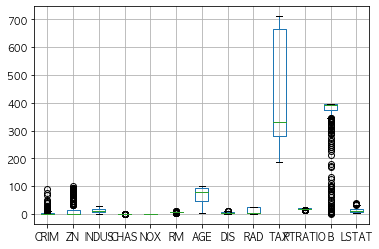

In [134]:
%matplotlib inline
dfX.boxplot() #이상치 천국,,,

In [135]:
# 변수들의 평균값 계산
mean_on_train = dfX.mean(axis=0)

# 변수들의 표준편차값 계산
std_on_train = dfX.std(axis=0)

# (값 - 평균) / 표준편차
dfX_scaled = (dfX - mean_on_train) / std_on_train

print(dfX_scaled.head())
print(dfX_scaled.describe())

# concat
df_scaled = pd.concat([dfX_scaled, dfy], axis = 1)

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  
               CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean   

<AxesSubplot:>

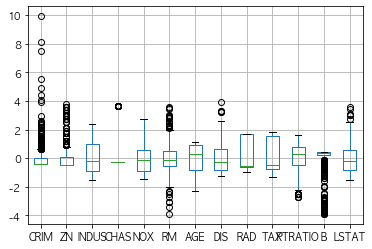

In [136]:
dfX_scaled.boxplot()

In [137]:
# OLS
model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_scaled)
result = model.fit()
result.summary() #Cond. No. | 9.82

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          6.72e-135
Time:                        20:39:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9291      0.283     -3.287      0.001      -1.484      -0.374
ZN             1.0826      0.320      3.382      0.001       0.454       1.712
INDUS          0.1410      0.422      0.334      0.738      -0.688       0.970
CHAS           0.6824      0.219      3.118      0.002       0.252       1.112
NOX           -2.0588      0.443     -4.651      0.000      -2.928      -1.189
RM             2.6769      0.294      9.116      0.000       2.100       3.254
AGE            0.0195      0.372      0.052      0.958      -0.711       0.750
DIS           -3.1071      0.420     -7.398      0.000      -3.932      -2.282
RAD            2.6649      0.578      4.613      0.000       1.530       3.800
TAX           -2.0788      0.634     -3.280      0.001      -3.324      -0.834
PTRATIO       -2.0626      0.283     -7.283      0.000      -2.619      -1.506
B              0.8501      0.245      3.467      0.001       0.368       1.332
LSTAT         -3.7473      0.362    -10.347      0.000      -4.459      -3.036
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# 교차 검증
# 표본 내 성능 검증 (in-sample testing)
# 표본 외 성능 검증 (out-of-sample testing)

#### 범주형 독립변수
- 카테고리형 변수인 월이 연속숫자형으로 인식되지 않도록 **C()** 함수 사용
- 
    ```model = sm.OLS.from_formula("value ~ C(month)+0", df)
    result = model.fit()
    result.summary()```
- +0 이 없으면 첫번째 변수 제외함

### 부분회귀 플롯
- 새로운 독립변수를 추가하여 다시 회귀분석을 하면 기존 가중치 벡터의 값은 변경됨
- 부분회귀플롯 : 독립변수가 여러개일 때 특정한 하나의 독립변수의 영향력을 시각화하는 방법

In [139]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df

/Users/woodeem/opt/anaconda3/envs/woodeem/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [140]:
import statsmodels.api as sm

model = sm.OLS(dfy, dfX)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:39:53   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='AGE', ylabel='MEDV'>

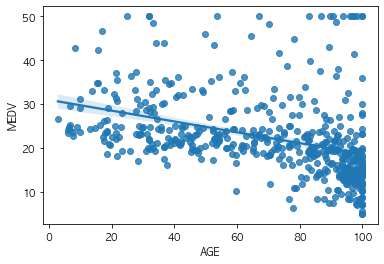

In [141]:
%matplotlib inline
import seaborn as sns

# age와 medv는 음의 상관관계처럼 보임
sns.regplot(x="AGE", y="MEDV", data=df)

In [142]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
others

['RM',
 'RAD',
 'TAX',
 'LSTAT',
 'INDUS',
 'PTRATIO',
 'NOX',
 'DIS',
 'B',
 'CRIM',
 'ZN',
 'CHAS']

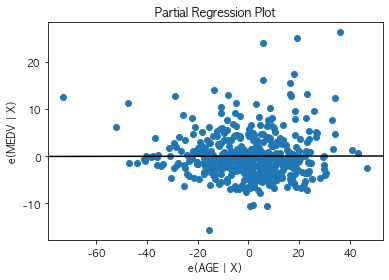

In [143]:
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt
plot_partregress("MEDV", "AGE", others, data=df, obs_labels=False) #obs_labels 데이터 라벨링여부
plt.show() #어떤 독립변수에서 다른 독립변수의 영향을 제거한 값 --> 사실 상관관계가 없당 !!

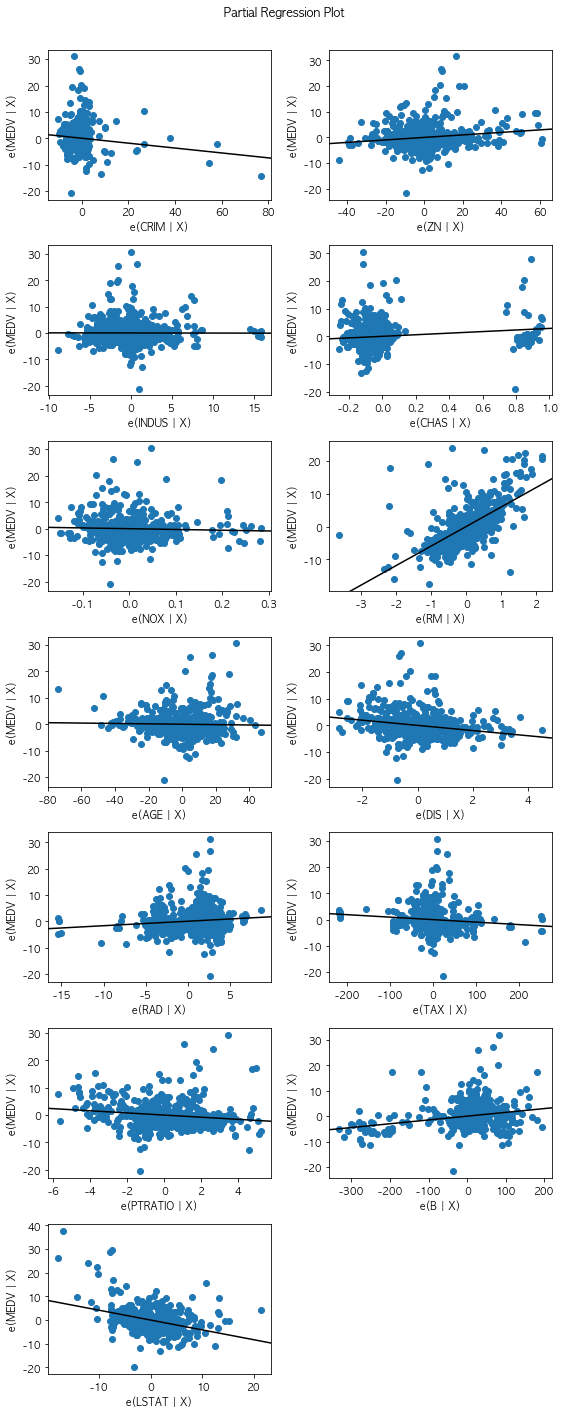

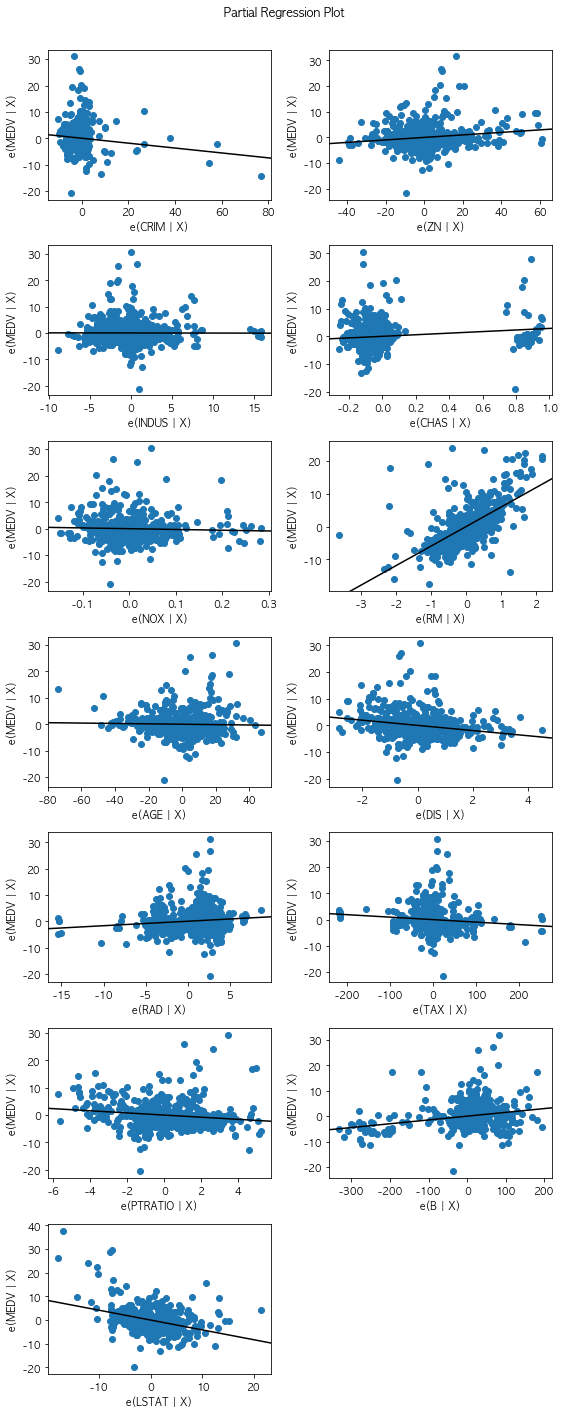

In [144]:
# 전체 데이터에 대해 한번에 부분회귀 플롯을 그리는 함수
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))
# result : 학습 완료된 모형
plot_partregress_grid(result, fig=fig)